In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
img = cv2.imread('lena.jpg')
#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#获取图像高度和宽度
h = grayImage.shape[0]
w = grayImage.shape[1]

## 大津法

In [18]:
def OTSU(img_array):            
    height = img_array.shape[0]
    width = img_array.shape[1]
    count_pixel = np.zeros(256)

    for i in range(height):
        for j in range(width):
            count_pixel[int(img_array[i][j])] += 1 
    max_variance = 0.0
    best_thresold = 0
    for thresold in range(256):
        n0 = count_pixel[:thresold].sum()
        n1 = count_pixel[thresold:].sum()
        w0 = n0 / (height * width)
        w1 = n1 / (height * width)
        u0 = 0.0
        u1 = 0.0

        for i in range(thresold):
            u0 += i * count_pixel[i]
        for j in range(thresold, 256):
            u1 += j * count_pixel[j]

        u = u0 * w0 + u1 * w1 
        tmp_var = w0 * np.power((u - u0), 2) + w1 * np.power((u - u1), 2)

        if tmp_var > max_variance:
            best_thresold = thresold
            max_variance = tmp_var

    return best_thresold

82.0


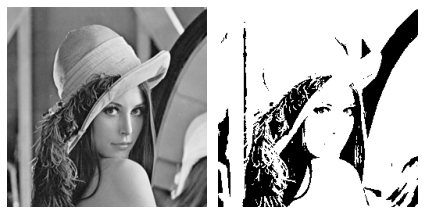

In [19]:
img = np.array(grayImage).astype(np.float32)
best_thresold=OTSU(grayImage)
ret1, th1 = cv2.threshold(grayImage, best_thresold, 255, cv2.THRESH_BINARY)
print(ret1)
plt.figure(figsize=(6, 8))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.axis('off')
plt.subplot(122), plt.imshow(th1, 'gray'), plt.axis('off')
plt.tight_layout()
plt.show()

## 迭代法

In [20]:
def Iteration(grayImage):
    img_array = np.array(grayImage).astype(np.float32) # 转化成数组
    I=img_array
    zmax=np.max(I)
    zmin=np.min(I)
    threshold =(zmax+zmin)/2 # 设置初始阈值
    #根据阈值将图像进行分割为前景和背景，分别求出两者的平均灰度  zo和zb
    b=1
    while b==0:
        ifg=0
        ibg=0
        fnum=0
        bnum=0
        for i in range(1,h):
             for j in range(1,w):
                tmp=I(i,j)
                if tmp>=threshold :
                    ifg=ifg+1
                    fnum=fnum+int(tmp)  #前景像素的个数以及像素值的总和
                else:
                    ibg=ibg+1
                    bnum=bnum+int(tmp)#背景像素的个数以及像素值的总和
        #计算前景和背景的平均值
        zo=int(fnum/ifg)
        zb=int(bnum/ibg)
        if threshold ==int((zo+zb)/2):
            b=0
        else:
            threshold =int((zo+zb)/2)
    return threshold 

129.0


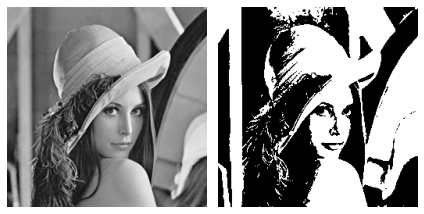

In [21]:
threshold=Iteration(grayImage)
ret2, th2 = cv2.threshold(grayImage, threshold, 255, cv2.THRESH_BINARY)
print(ret2)
plt.figure(figsize=(6, 8))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.axis('off')
plt.subplot(122), plt.imshow(th2, 'gray'), plt.axis('off')
plt.tight_layout()
plt.show()